In [1]:
!pip install scanpy


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import scanpy as sc

In [3]:
adata = sc.read_csv('COVID-19//GSM5226574_C51ctr_raw_counts.csv').T
adata

AnnData object with n_obs × n_vars = 6099 × 34546

### Proccessing

In [5]:
adata.var

""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409
...
VN1R2
AL031676.1
SMIM34A
AL050402.1


In [6]:
adata.var[adata.var.index.str.startswith('MT')]   ##without dash(-) is wrong

""
MTOR
MTOR-AS1
MTHFR
MTFR1L
MTF1
...
MT1A
MT1B
MTRNR2L13
MTRNR2L7


In [7]:
adata.var[adata.var.index.str.startswith('MT-')]

""
MT-ND1
MT-ND2
MT-CO1
MT-CO2
MT-ATP8
MT-ATP6
MT-CO3
MT-ND3
MT-ND4L
MT-ND4


In [9]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')

In [10]:
adata.var

,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


In [ ]:
#for RIBO we can do the same thing however a trick here is using a list of genes

In [12]:
import pandas as pd

In [13]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [14]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [15]:
ribo_genes[0].values

array(['FAU', 'MRPL13', 'RPL10', 'RPL10A', 'RPL10L', 'RPL11', 'RPL12',
       'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A',
       'RPL19', 'RPL21', 'RPL22', 'RPL22L1', 'RPL23', 'RPL23A', 'RPL24',
       'RPL26', 'RPL26L1', 'RPL27', 'RPL27A', 'RPL28', 'RPL29', 'RPL3',
       'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL35A', 'RPL36',
       'RPL36A', 'RPL36AL', 'RPL37', 'RPL37A', 'RPL38', 'RPL39', 'RPL3L',
       'RPL4', 'RPL41', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9',
       'RPLP0', 'RPLP1', 'RPLP2', 'RPS10', 'RPS11', 'RPS12', 'RPS13',
       'RPS15', 'RPS15A', 'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS2',
       'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 'RPS26', 'RPS27',
       'RPS27A', 'RPS27L', 'RPS28', 'RPS29', 'RPS3', 'RPS3A', 'RPS4X',
       'RPS4Y1', 'RPS5', 'RPS6', 'RPS7', 'RPS8', 'RPS9', 'RPSA',
       'RSL24D1', 'RSL24D1P11', 'UBA52'], dtype=object)

In [16]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [17]:
adata.var

,mt,ribo
AL627309.1,False,False
AL627309.5,False,False
AL627309.4,False,False
AL669831.2,False,False
LINC01409,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


In [18]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [19]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,False,False,8,0.001312,99.868831,8.0
AL627309.5,False,False,33,0.005411,99.458928,33.0
AL627309.4,False,False,4,0.000656,99.934415,4.0
AL669831.2,False,False,2,0.000328,99.967208,2.0
LINC01409,False,False,274,0.048697,95.507460,297.0
...,...,...,...,...,...,...
VN1R2,False,False,0,0.000000,100.000000,0.0
AL031676.1,False,False,0,0.000000,100.000000,0.0
SMIM34A,False,False,0,0.000000,100.000000,0.0
AL050402.1,False,False,0,0.000000,100.000000,0.0


In [20]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGTACCATGGCCAC-1_1,6764,24256.0,153.0,0.630772,55.0,0.226748
ATTCACTGTAACAGGC-1_1,6686,19020.0,404.0,2.124080,115.0,0.604627
TAACTTCCAACCACGC-1_1,5158,15645.0,221.0,1.412592,211.0,1.348674
TTGGGTACACGACAAG-1_1,4900,15220.0,3.0,0.019711,5.0,0.032852
AGGCCACAGAGTCACG-1_1,5544,13217.0,417.0,3.155028,82.0,0.620413
...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827


In [21]:
adata.var.sort_values('n_cells_by_counts')   #sort by "n cell by counts"

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL445072.1,False,False,0,0.000000,100.000000,0.0
AC073270.1,False,False,0,0.000000,100.000000,0.0
AC073349.5,False,False,0,0.000000,100.000000,0.0
AC005482.1,False,False,0,0.000000,100.000000,0.0
SPDYE8P,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0
NEAT1,False,False,4546,5.314150,25.463191,32411.0
MBNL1,False,False,4554,2.877029,25.332022,17547.0
ZBTB20,False,False,4699,2.601082,22.954583,15864.0


In [ ]:
# filter genes which are in lower than 3 cells

In [22]:
sc.pp.filter_genes(adata, min_cells=3)

In [23]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AL929091.1,False,False,3,0.000492,99.950812,3.0,3
AC006441.3,False,False,3,0.000492,99.950812,3.0,3
AC022017.1,False,False,3,0.000492,99.950812,3.0,3
AC024597.1,False,False,3,0.000492,99.950812,3.0,3
PCARE,False,False,3,0.000492,99.950812,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0,4458
NEAT1,False,False,4546,5.314150,25.463191,32411.0,4546
MBNL1,False,False,4554,2.877029,25.332022,17547.0,4554
ZBTB20,False,False,4699,2.601082,22.954583,15864.0,4699


In [25]:
adata.obs.sort_values('total_counts')

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TGGTACAGTTGGTGTT-1_1,323,401.0,0.0,0.000000,0.0,0.000000
CTCAACCGTTTGGGAG-1_1,325,401.0,0.0,0.000000,0.0,0.000000
GTCGTTCTCCAAGGGA-1_1,300,401.0,0.0,0.000000,0.0,0.000000
CGAGAAGGTGAACTAA-1_1,308,401.0,0.0,0.000000,0.0,0.000000
CAGGGCTTCATGCGGC-1_1,330,401.0,7.0,1.745636,1.0,0.249377
...,...,...,...,...,...,...
AGGCCACAGAGTCACG-1_1,5544,13217.0,417.0,3.155028,82.0,0.620413
TTGGGTACACGACAAG-1_1,4900,15220.0,3.0,0.019711,5.0,0.032852
TAACTTCCAACCACGC-1_1,5158,15645.0,221.0,1.412592,211.0,1.348674
ATTCACTGTAACAGGC-1_1,6686,19020.0,404.0,2.124080,115.0,0.604627


In [26]:
adata.obs.sort_values('n_genes_by_counts')

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGGTTTCTGGCTGG-1_1,276,419.0,1.0,0.238663,1.0,0.238663
CGTGCTTCAAAGGGCT-1_1,277,432.0,41.0,9.490741,0.0,0.000000
TGACAGTTCTAAACGC-1_1,278,414.0,0.0,0.000000,0.0,0.000000
CTCTGGTCACGACGAA-1_1,285,407.0,0.0,0.000000,0.0,0.000000
GTAAGTCGTATCGCGC-1_1,289,430.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...
TAACTTCCAACCACGC-1_1,5158,15645.0,221.0,1.412592,211.0,1.348674
CACTGAAGTCGAAGCA-1_1,5487,12725.0,355.0,2.789784,82.0,0.644401
AGGCCACAGAGTCACG-1_1,5544,13217.0,417.0,3.155028,82.0,0.620413
ATTCACTGTAACAGGC-1_1,6686,19020.0,404.0,2.124080,115.0,0.604627


In [27]:
sc.pp.filter_cells(adata, min_genes=200)

In [28]:
adata.obs.sort_values('n_genes_by_counts')

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes
TAGGGTTTCTGGCTGG-1_1,276,419.0,1.0,0.238663,1.0,0.238663,274
CGTGCTTCAAAGGGCT-1_1,277,432.0,41.0,9.490741,0.0,0.000000,277
TGACAGTTCTAAACGC-1_1,278,414.0,0.0,0.000000,0.0,0.000000,277
CTCTGGTCACGACGAA-1_1,285,407.0,0.0,0.000000,0.0,0.000000,284
GTAAGTCGTATCGCGC-1_1,289,430.0,0.0,0.000000,0.0,0.000000,288
...,...,...,...,...,...,...,...
TAACTTCCAACCACGC-1_1,5158,15645.0,221.0,1.412592,211.0,1.348674,5145
CACTGAAGTCGAAGCA-1_1,5487,12725.0,355.0,2.789784,82.0,0.644401,5471
AGGCCACAGAGTCACG-1_1,5544,13217.0,417.0,3.155028,82.0,0.620413,5529
ATTCACTGTAACAGGC-1_1,6686,19020.0,404.0,2.124080,115.0,0.604627,6661


#### using plots for QC

In [ ]:
# here we want to use some plots to find out for better quality control

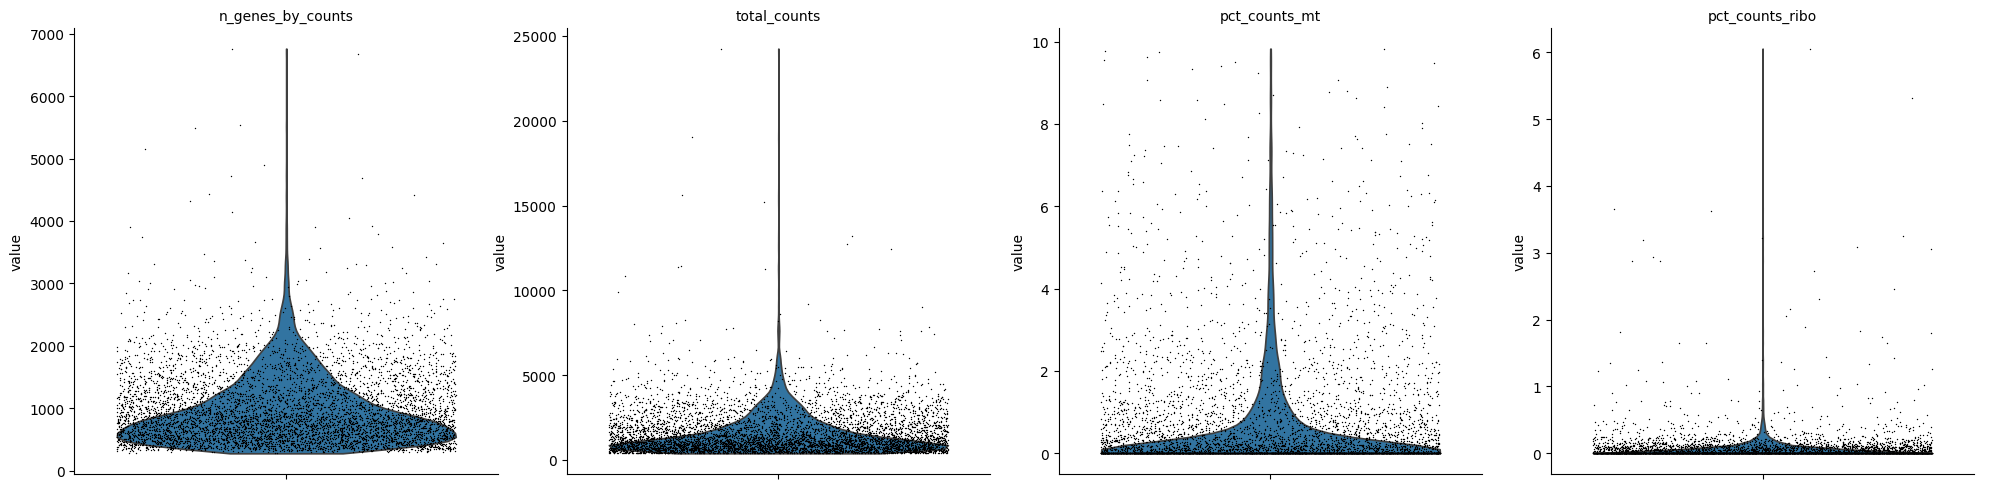

In [29]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [30]:
import numpy as np

In [31]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)    #here we find a point that 98% of data are involved.
#upper_lim = 3000

In [32]:
upper_lim

2479.08

In [34]:
adata.obs.sort_values('n_genes_by_counts')

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes
TAGGGTTTCTGGCTGG-1_1,276,419.0,1.0,0.238663,1.0,0.238663,274
CGTGCTTCAAAGGGCT-1_1,277,432.0,41.0,9.490741,0.0,0.000000,277
TGACAGTTCTAAACGC-1_1,278,414.0,0.0,0.000000,0.0,0.000000,277
CTCTGGTCACGACGAA-1_1,285,407.0,0.0,0.000000,0.0,0.000000,284
GTAAGTCGTATCGCGC-1_1,289,430.0,0.0,0.000000,0.0,0.000000,288
...,...,...,...,...,...,...,...
TAACTTCCAACCACGC-1_1,5158,15645.0,221.0,1.412592,211.0,1.348674,5145
CACTGAAGTCGAAGCA-1_1,5487,12725.0,355.0,2.789784,82.0,0.644401,5471
AGGCCACAGAGTCACG-1_1,5544,13217.0,417.0,3.155028,82.0,0.620413,5529
ATTCACTGTAACAGGC-1_1,6686,19020.0,404.0,2.124080,115.0,0.604627,6661


In [35]:
adata = adata[adata.obs.n_genes_by_counts < upper_lim]

In [36]:
adata.obs.sort_values('n_genes_by_counts')

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes
TAGGGTTTCTGGCTGG-1_1,276,419.0,1.0,0.238663,1.0,0.238663,274
CGTGCTTCAAAGGGCT-1_1,277,432.0,41.0,9.490741,0.0,0.000000,277
TGACAGTTCTAAACGC-1_1,278,414.0,0.0,0.000000,0.0,0.000000,277
CTCTGGTCACGACGAA-1_1,285,407.0,0.0,0.000000,0.0,0.000000,284
GTAAGTCGTATCGCGC-1_1,289,430.0,0.0,0.000000,0.0,0.000000,288
...,...,...,...,...,...,...,...
CCATCACAGGAAAGAC-1_1,2466,4504.0,395.0,8.769982,29.0,0.643872,2458
ATCGTCCTCGTTCAGA-1_1,2466,4802.0,11.0,0.229071,0.0,0.000000,2459
GTCTGTCAGGTACATA-1_1,2474,4687.0,89.0,1.898869,3.0,0.064007,2472
GCTGAATGTAACTAAG-1_1,2477,4640.0,242.0,5.215517,8.0,0.172414,2474


In [38]:
adata.obs.sort_values('n_genes_by_counts', ascending=False)   #sort by "n genes by counts" from higher to lower

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes
TCACACCCAACTTCTT-1_1,2479,5325.0,0.0,0.000000,0.0,0.000000,2479
GCTGAATGTAACTAAG-1_1,2477,4640.0,242.0,5.215517,8.0,0.172414,2474
GTCTGTCAGGTACATA-1_1,2474,4687.0,89.0,1.898869,3.0,0.064007,2472
ATCGTCCTCGTTCAGA-1_1,2466,4802.0,11.0,0.229071,0.0,0.000000,2459
CCATCACAGGAAAGAC-1_1,2466,4504.0,395.0,8.769982,29.0,0.643872,2458
...,...,...,...,...,...,...,...
GTAAGTCGTATCGCGC-1_1,289,430.0,0.0,0.000000,0.0,0.000000,288
CTCTGGTCACGACGAA-1_1,285,407.0,0.0,0.000000,0.0,0.000000,284
TGACAGTTCTAAACGC-1_1,278,414.0,0.0,0.000000,0.0,0.000000,277
CGTGCTTCAAAGGGCT-1_1,277,432.0,41.0,9.490741,0.0,0.000000,277


In [41]:
adata = adata[adata.obs.pct_counts_mt < 20]   #it is usually 20% for mirochindria

In [42]:
adata = adata[adata.obs.pct_counts_ribo < 2]

In [43]:
adata

View of AnnData object with n_obs × n_vars = 5960 × 24660
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

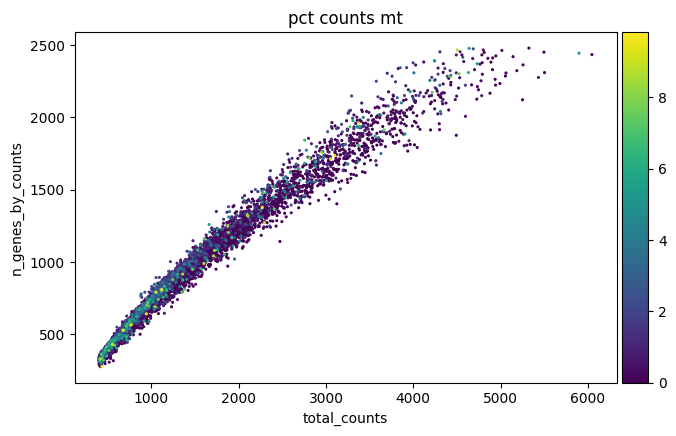

In [44]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [ ]:
# Based on the QC metric plots, one could now remove cells that have too many mitochondrial genes expressed or too many total counts by setting manual or automatic thresholds. However, sometimes what appears to be poor QC metrics can be driven by real biology so we suggest starting with a very permissive filtering strategy and revisiting it at a later point. We therefore now only filter cells with less than 100 genes expressed and genes that are detected in less than 3 cells.

### now our data is clean and we can start next step

## Normaliztion

In [45]:
adata.X

ArrayView([[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
adata.X.sum(axis=1)

array([6043., 5895., 5496., ...,  410.,  405.,  410.], dtype=float32)

In [ ]:
# Saving count data    #before normalization it is better to save your data in a layer
adata.layers["counts"] = adata.X.copy()

In [47]:
sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI

C:\Users\Birtech\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\preprocessing\_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [48]:
adata.X.sum(axis = 1)

array([10000., 10000., 10000., ..., 10000., 10000., 10000.], dtype=float32)

In [49]:
sc.pp.log1p(adata) #change to log counts

In [50]:
adata.X.sum(axis = 1)

array([3155.047  , 3218.0122 , 3416.0486 , ..., 1191.2708 , 1022.75116,
       1162.8785 ], dtype=float32)

In [ ]:
# now we copy adata in adata.raw which can use it in next steps when we need.

In [51]:
adata.raw = adata

In [52]:
adata.raw

In [53]:
adata

AnnData object with n_obs × n_vars = 5960 × 24660
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'log1p'

In [56]:
print(adata.raw)

Raw AnnData with n_obs × n_vars = 5960 × 24660
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'


In [55]:
print(adata)

AnnData object with n_obs × n_vars = 5960 × 24660
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'log1p'


### Clustering

In [ ]:
# you can skip if you have more data and want to integrate them and then visual your data however it is useful too.

In [57]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)

In [ ]:
#Annotate highly variable genes [Satija et al., 2015, Stuart et al., 2019, Zheng et al., 2017].

#Expects logarithmized data, except when flavor='seurat_v3'/'seurat_v3_paper', in which count data is expected.

In [58]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,8,0.001312,99.868831,8.0,8,False,0.011136,2.697174,1.140483
AL627309.5,False,False,33,0.005411,99.458928,33.0,33,False,0.028855,2.254608,-0.158258
AL627309.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002331,1.702854,-1.777421
LINC01409,False,False,274,0.048697,95.507460,297.0,274,False,0.270478,2.286819,-0.063733
FAM87B,False,False,6,0.000984,99.901623,6.0,6,False,0.006682,1.947490,-1.059518
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,False,False,133,0.022627,97.819315,138.0,133,False,0.152258,2.374868,0.194653
AL592183.1,False,False,1003,0.198721,83.554681,1212.0,1003,False,0.869986,2.461951,-0.429024
AC240274.1,False,False,162,0.027382,97.343827,167.0,162,False,0.150268,2.265893,-0.125142
AC007325.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002801,1.579830,-2.138445


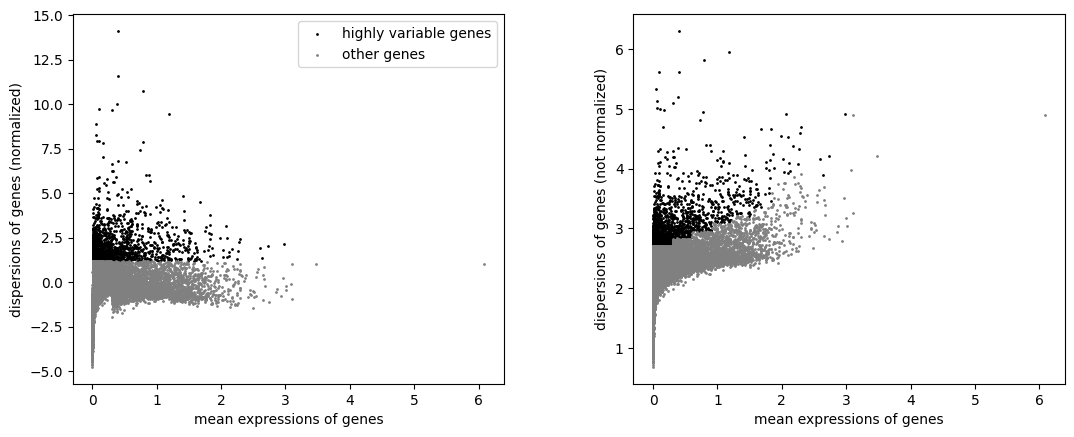

In [59]:
sc.pl.highly_variable_genes(adata)

In [65]:
adata = adata[:, adata.var.highly_variable]   #choose not highly variable genes

In [66]:
adata

View of AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [67]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

C:\Users\Birtech\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\preprocessing\_simple.py:672: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [68]:
adata

AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [69]:
 sc.pp.scale(adata, max_value=10)

In [70]:
sc.tl.pca(adata, svd_solver='arpack')

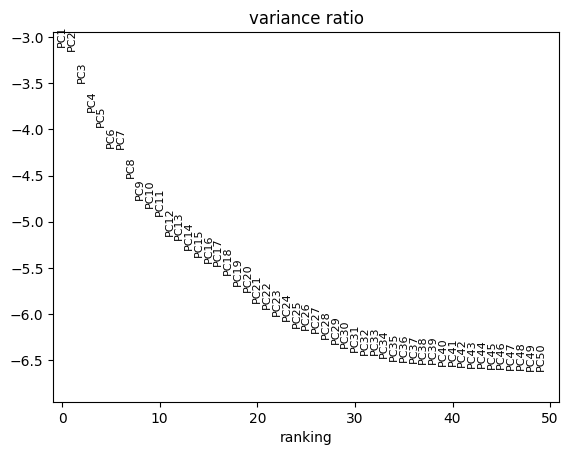

In [71]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [72]:
sc.pp.neighbors(adata, n_pcs = 30)    #here we can see 30 is the best choice because after that the plot is flat.

In [76]:
adata    #here we can see on obsp: distances and connectivities

AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [77]:
adata.obsp['connectivities']

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 122680 stored elements and shape (5960, 5960)>

In [78]:
adata.obsp['connectivities'].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
adata.obsp['distances']

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 83440 stored elements and shape (5960, 5960)>

In [80]:
adata.obsp['distances'].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
sc.tl.umap(adata)

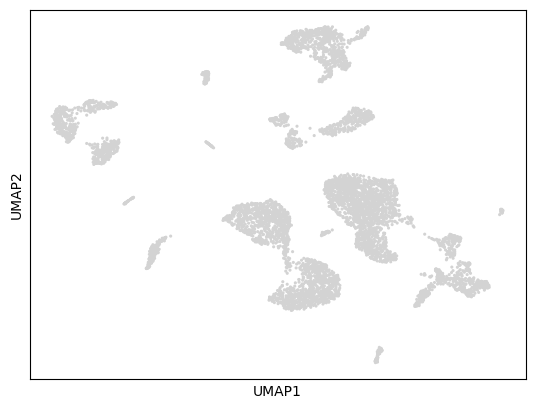

In [74]:
sc.pl.umap(adata)

In [81]:
!pip install leidenalg


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
sc.tl.leiden(adata, resolution = 0.5)    #closer to 1 = more cluster

C:\Users\Birtech\AppData\Local\Temp\ipykernel_3752\3246266323.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 0.5)


In [84]:
adata.obs    #to see leiden

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,leiden
TCACACCCAACTTCTT-1_1,2479,5325.0,0.0,0.000000,0.0,0.000000,2479,2
GCTGAATGTAACTAAG-1_1,2477,4640.0,242.0,5.215517,8.0,0.172414,2474,2
GTCTGTCAGGTACATA-1_1,2474,4687.0,89.0,1.898869,3.0,0.064007,2472,1
CCATCACAGGAAAGAC-1_1,2466,4504.0,395.0,8.769982,29.0,0.643872,2458,10
ATCGTCCTCGTTCAGA-1_1,2466,4802.0,11.0,0.229071,0.0,0.000000,2459,2
...,...,...,...,...,...,...,...,...
GTAAGTCGTATCGCGC-1_1,289,430.0,0.0,0.000000,0.0,0.000000,288,6
CTCTGGTCACGACGAA-1_1,285,407.0,0.0,0.000000,0.0,0.000000,284,1
TGACAGTTCTAAACGC-1_1,278,414.0,0.0,0.000000,0.0,0.000000,277,0
CGTGCTTCAAAGGGCT-1_1,277,432.0,41.0,9.490741,0.0,0.000000,277,12


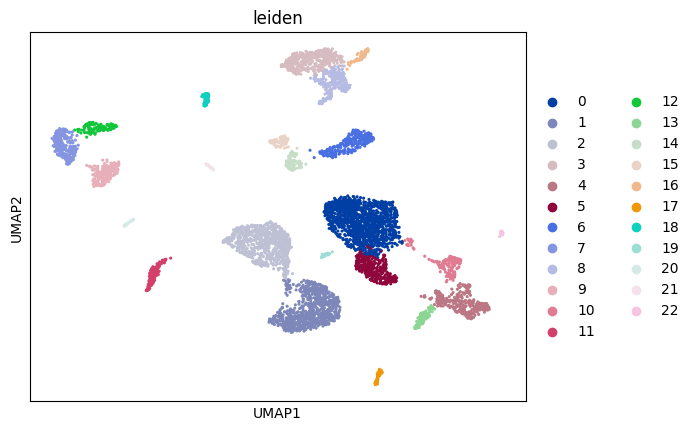

In [85]:
sc.pl.umap(adata, color=['leiden'])